# Installation and configuration of IBL packages

In [1]:
!pip install --quiet ONE-api
!pip install --quiet ibllib

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 11.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.0/44.0 kB 1.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 139.3/139.3 kB 9.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14.1/14.1 MB 54.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.7/85.7 kB 6.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 181.5/181.5 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Gettin

In [2]:
# When running in jupyter set number of threads to 1
import os
os.environ.setdefault('ONE_HTTP_DL_THREADS', '1')

from one.api import ONE
ONE.setup(base_url='https://openalyx.internationalbrainlab.org', silent=True)
one = ONE(password='international')

Connected to https://openalyx.internationalbrainlab.org as user "intbrainlab"


In [3]:
# Suppress some future warnings
import warnings
warnings.simplefilter("ignore", FutureWarning)

# Change the load method depending on python version
from one.remote.aws import s3_download_file, get_s3_public
import pandas as pd
import sys
python_ver = sys.version_info

if python_ver >= (3, 10):
    from one.alf.path import add_uuid_string
else:
    from one.alf.files import add_uuid_string

s3, bucket = get_s3_public()

def load_aggregate(subject, dataset):
    if sys.version_info >= (3, 10):
        return one.load_aggregate('subjects', subject, dataset)
    else:
        files = one.list_aggregates('subjects', subject, dataset=dataset)
        files = files.iloc[0]
        src_path = str(add_uuid_string(files['rel_path'], files.name))
        dst_path = one.cache_dir.joinpath(files['rel_path'])
        local_file = s3_download_file(src_path, dst_path, s3=s3, bucket_name=bucket)
        return pd.read_parquet(local_file)

# Finding subjects with training data

In [4]:
import numpy as np

# Find all aggregate training datasets from IBL behaviour paper
datasets = one.alyx.rest('datasets', 'list', tag='2021_Q1_IBL_et_al_Behaviour', name='_ibl_subjectTrials.table.pqt')

# Find the subject name from the info stored in the relative path
subjects = np.unique([d['file_records'][0]['relative_path'].split('/')[2] for d in datasets])

# Loading trials data for a single subject

In [5]:
# Load in the subjectTrials table and sessionTrials table for the first subject
subject = subjects[0]
subject_trials = load_aggregate(subject, '_ibl_subjectTrials.table.pqt')
session_trials = load_aggregate(subject, '_ibl_subjectSessions.table.pqt')

# Add in lab, task_protocol, subject name information from the sessions table
if 'task_protocol' in subject_trials:
    subject_trials = subject_trials.drop('task_protocol', axis=1)
subject_trials = subject_trials.set_index('session').join(session_trials.drop('date', axis=1))

/usr/local/lib/python3.12/dist-packages/one/util.py:414: ALFWarning: No default revision for dataset aggregates/Subjects/churchlandlab/CSHL045/#2024-04-10#/_ibl_subjectTrials.table.pqt; using most recent
  warnings.warn(
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/aggregates/Subjects/churchlandlab/CSHL045/#2024-04-10#/_ibl_subjectTrials.table.pqt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9.27M/9.27M [00:00<00:00, 22.6MB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/aggregates/Subjects/churchlandlab/CSHL045/_ibl_subjectSessions.table.pqt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8.98k/8.98k [00:00<00:00, 81.8kB/s]


The `subject_trials` table contains all the trials data for each training session collected in the subject. See [here](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#heading=h.ls81qq9ihg4x) for more information about this dataset.

We can find the number of sessions collected, or the number of times the subject was run under a specific task protocol

In [6]:
# Find the number of sessions for this subject
n_sessions = subject_trials.index.unique().size
print(f'Subject {subject} has {n_sessions} sessions')

# Find the number of times a task protocol was run
n_protocols = subject_trials[~subject_trials.index.duplicated()].task_protocol.value_counts()
print(n_protocols)

Subject CSHL045 has 76 sessions
task_protocol
_iblrig_tasks_biasedChoiceWorld6.3.1      17
_iblrig_tasks_trainingChoiceWorld6.1.3    14
_iblrig_tasks_trainingChoiceWorld6.2.5    12
_iblrig_tasks_trainingChoiceWorld6.3.1    11
_iblrig_tasks_biasedChoiceWorld6.2.5       6
_iblrig_tasks_ephysChoiceWorld6.2.5        3
_iblrig_tasks_trainingChoiceWorld6.2.4     3
_iblrig_tasks_trainingChoiceWorld6.0.6     3
_iblrig_tasks_trainingChoiceWorld6.2.1     2
_iblrig_tasks_ephysChoiceWorld6.4.0        2
_iblrig_tasks_trainingChoiceWorld6.2.0     1
_iblrig_tasks_trainingChoiceWorld6.1.1     1
_iblrig_tasks_trainingChoiceWorld6.1.2     1
Name: count, dtype: int64


We can get the trials data for an individual session of choice, here a the first session using the biasedChoiceWorld protocol

In [ ]:
# Get the trials data for a single session
# Find a session run under biasedChoiceWorld
sess = subject_trials[subject_trials['task_protocol'].str.contains('biasedChoiceWorld')].index.unique()[0]
trials = subject_trials[subject_trials.index == sess]

Using this data we can plot the psychometric curve and compute some performance metrics, for example the number of trials in the session or the performance of the mouse on easy trials (50% and 100% contrast)

Number of trials for session a4f7079b-d157-4de9-ba80-de9a98f35c8b: 682
Performance easy for session a4f7079b-d157-4de9-ba80-de9a98f35c8b: 0.9457364341085271


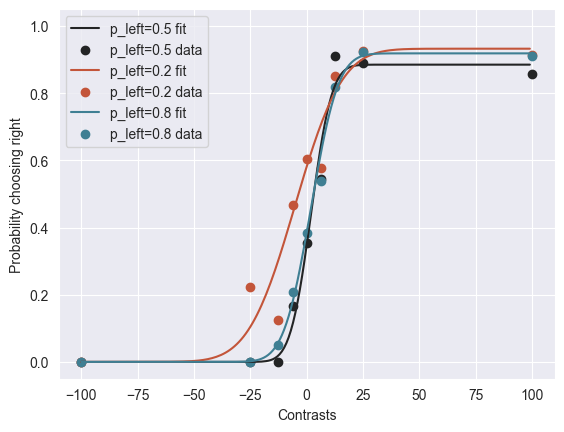

In [ ]:
from brainbox.behavior.training import plot_psychometric, compute_n_trials, compute_performance_easy, compute_performance

plot_psychometric(trials)
n_trials = compute_n_trials(trials)
perf_easy = compute_performance_easy(trials)
print(f'Number of trials for session {sess}: {n_trials}')
print(f'Performance easy for session {sess}: {perf_easy}')

## Combining training criteria

Another [dataset](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#heading=h.18vu2zskyq0r) is available that contains information about the session at which the subject reached certain training criteria in the IBL training pipeline. More information can be found about the training pipeline in the study [A standardized and reproducible method to measure decision-making in mice](https://doi.org/10.1101/2020.01.17.909838).

We can download this dataset in the following way

In [ ]:
subject_training = load_aggregate(subject, '_ibl_subjectTraining.table.pqt')

We can combine this with our subject trials table to see how the subject progressed

In [ ]:
subject_trials = (subject_trials
          .join(subject_training.set_index('session'))
          .sort_values(by=['session_start_time', 'intervals_0']))
subject_trials['training_status'] = subject_trials.training_status.fillna(method='ffill')

Our subject trials table now has a new column that indicates the training criteria of the mouse at each session. We can use this information to make a plot of how the performance of the mouse improved across training days.

We will need to compute the performance per session and add this column to our dataframe and also add in a column for training day.

In [ ]:
sessions = subject_trials.index.unique()
for n_sess, sess in enumerate(sessions):
  trials = subject_trials[subject_trials.index == sess]
  perf_easy = compute_performance_easy(trials)
  subject_trials.loc[subject_trials.index == sess, 'performance_easy'] = perf_easy
  subject_trials.loc[subject_trials.index == sess, 'training_day'] = n_sess

Note since we already ordered by session_start_time above our table was already sorted. Here we have simply assigned each training session to a training day but there are some cases where multiple training sessions were run on the same day so this may be something you want to account for in your analysis.

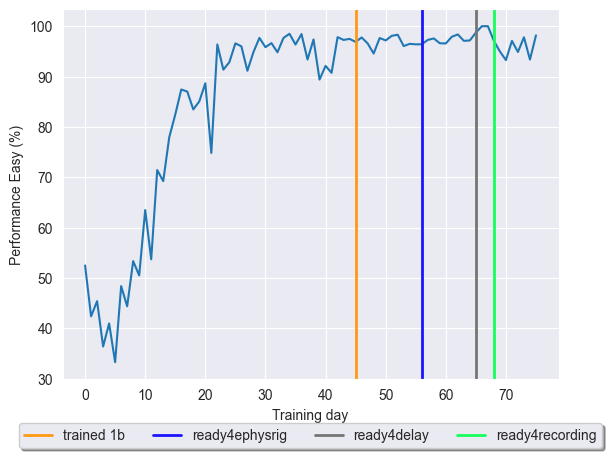

In [ ]:
import matplotlib.pyplot as plt
from ibllib.pipes.training_status import TRAINING_STATUS
fig, ax = plt.subplots(1, 1)
ax.plot(subject_trials['training_day'], subject_trials['performance_easy'] * 100)
ax.set_xlabel("Training day")
ax.set_ylabel("Performance Easy (%)")
status = subject_trials.drop_duplicates(subset='training_status', keep='first')
for _, st in status.iterrows():
    if st['training_status'] in ['untrainable', 'unbiasable']:
        continue
    if TRAINING_STATUS[st['training_status']][0] <= 0:
        continue
    ax.axvline(st['training_day'], linewidth=2,
               color=np.array(TRAINING_STATUS[st['training_status']][1]) / 255, label=st['training_status'])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
                   fancybox=True, shadow=True, ncol=5)

# Combining data across multiple subjects

We can loop over all the subjects available to get a large dataframe that contains the data for all the subjects. Here is an example of how this can be done


In [ ]:
import pandas as pd

all_trials = []

# Download two tables, subject trials table and subject training table and combine
for i, subject in enumerate(subjects):
  if np.mod(i, 50) == 0:
    print(f'{i}/{len(subjects)}')

  # Load trials table for subject
  subject_trials = load_aggregate(subject, '_ibl_subjectTrials.table.pqt')

  # Load sessions table for subject
  session_trials = load_aggregate(subject, '_ibl_subjectSessions.table.pqt')

  # Load training status for subject
  subject_training = load_aggregate(subject, '_ibl_subjectTraining.table.pqt')

  # Combine the two tables
  subject_trials = (subject_trials
            .set_index('session')
            .join(subject_training.set_index('session'))
            .sort_values(by=['session_start_time', 'intervals_0']))
  subject_trials['training_status'] = subject_trials.training_status.fillna(method='ffill')

  # Join sessions table for number, task_protocol, etc.
  if 'task_protocol' in subject_trials:
      subject_trials = subject_trials.drop('task_protocol', axis=1)
  subject_trials = subject_trials.join(session_trials.drop('date', axis=1))

  # Sort the trials by session start time and trial number
  subject_trials = subject_trials.sort_values(by=['session_start_time', 'intervals_0'])


  # add in extra columns for performance easy and training day
  sessions = subject_trials.index.unique()
  for n_sess, sess in enumerate(sessions):
    trials = subject_trials[subject_trials.index == sess]
    perf_easy = compute_performance_easy(trials)
    subject_trials.loc[subject_trials.index == sess, 'performance_easy'] = perf_easy
    subject_trials.loc[subject_trials.index == sess, 'training_day'] = n_sess


  all_trials.append(subject_trials)

all_trials = pd.concat(all_trials)

0/140
50/140
100/140


Once we have this large training table aggregated across all subjects we can manipulate this table to view different properties. For example we can see how the pyshcometric curves varies across the different training stages across all subjects

<Axes: xlabel='signed_contrast', ylabel='choice'>

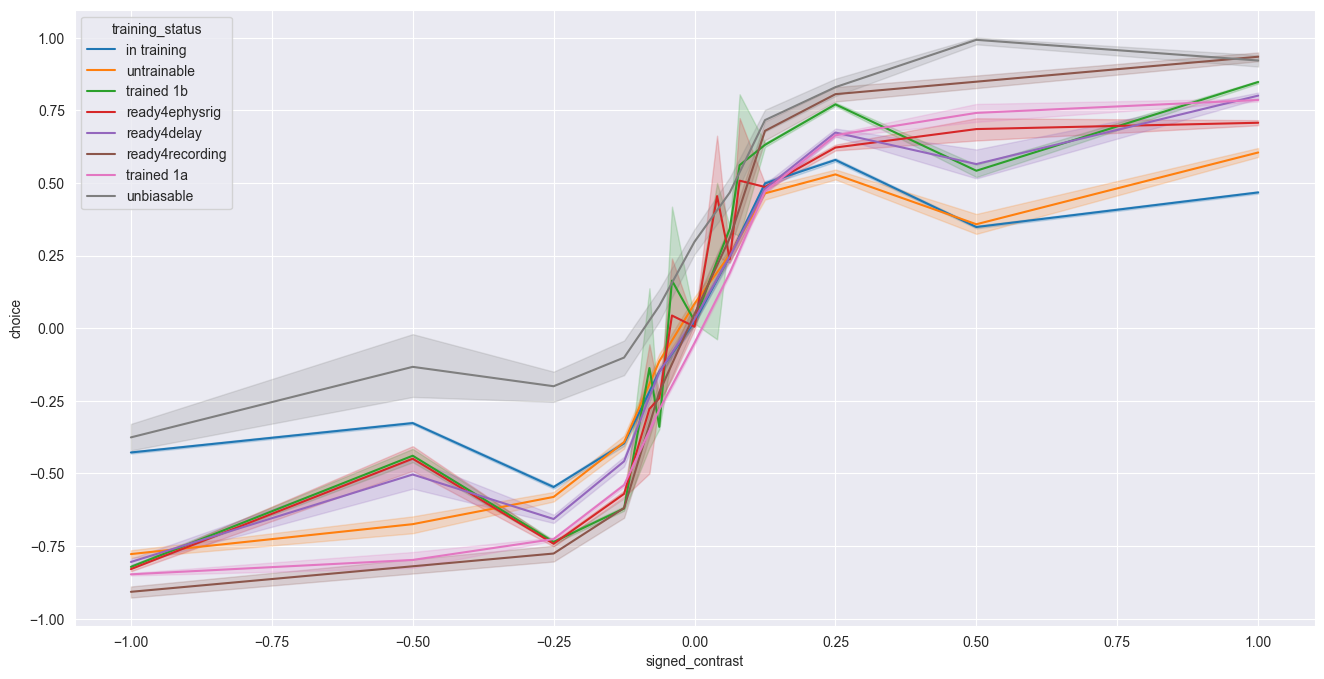

In [ ]:
import seaborn as sns
# plot psychometric curves for the whole dataframe
all_trials = all_trials.reset_index()
all_trials['signed_contrast'] = np.nan
i = np.isnan(all_trials['contrastRight'])
all_trials.loc[i , 'signed_contrast'] = all_trials.loc[i, 'contrastLeft']
all_trials.loc[~i, 'signed_contrast'] = - all_trials.loc[~i, 'contrastRight']

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(16, 8))
sns.lineplot(data=all_trials.loc[all_trials['probabilityLeft'] == 0.5], x='signed_contrast', y='choice', hue='training_status', ax=ax)

Or we can look how the performance on easy trial progresses over training days across labs

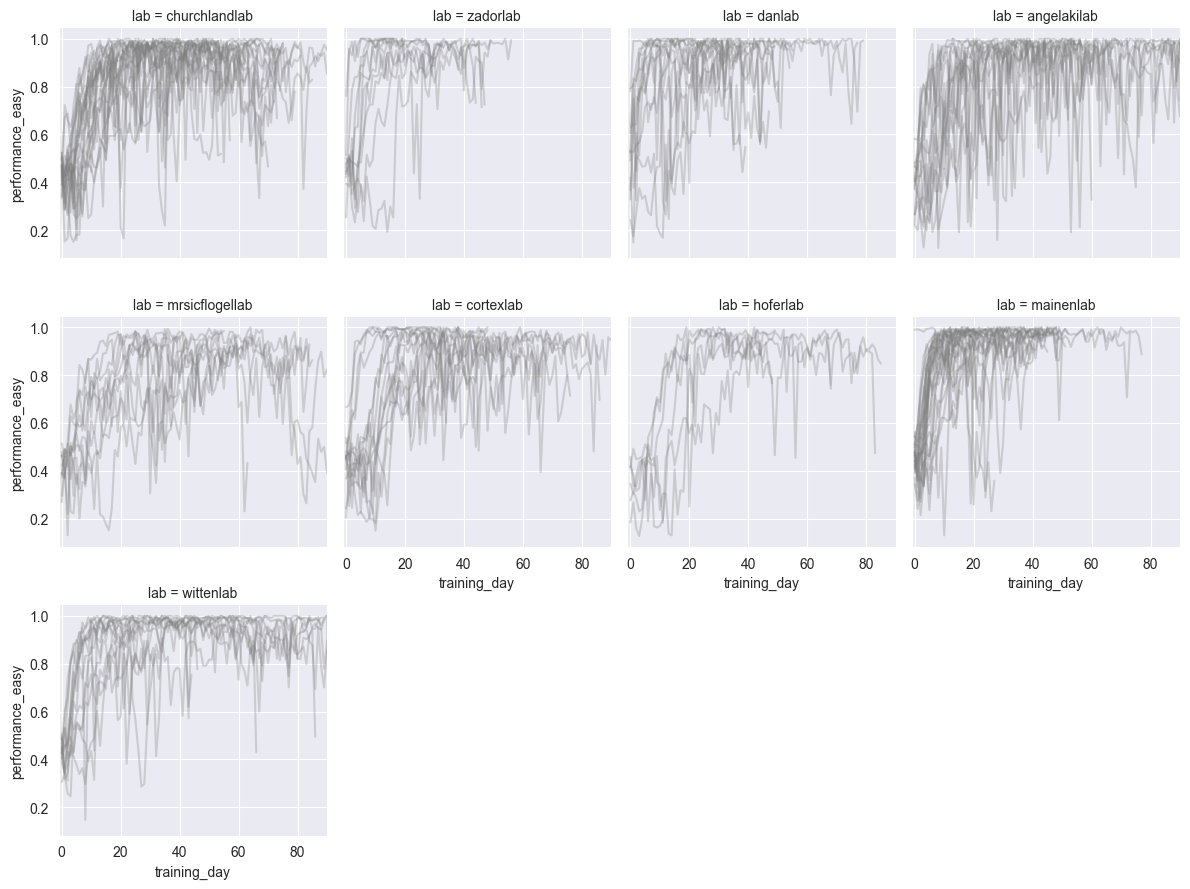

In [ ]:
# Remove duplicate rows that we don't need for the plots
fig = sns.FacetGrid(all_trials.drop_duplicates('session'),
                    col="lab", col_wrap=4,
                    sharex=True, sharey=True, aspect=1, hue="subject", xlim=[-1, 90])
fig.map(sns.lineplot, "training_day",
        "performance_easy", color='gray', alpha=0.3)

# Additional resources

Documentation

- [ONE documentation](https://int-brain-lab.github.io/iblenv/notebooks_external/one_quickstart.html#)
- [Getting started with ONE](https://colab.research.google.com/drive/1y3sRI1wC7qbWqN6skvulzPOp6xw8tLm7)
- [Loading trials data](https://int-brain-lab.github.io/iblenv/notebooks_external/loading_trials_data.html)


Where can I find help?
- Issues with the data? Post an issue here: https://neurostars.org/ with the tag `ibl`
- Alternatively post an issue here: https://github.com/int-brain-lab/iblenv/issues
- General questions about the datasets or publications? Email: info@internationalbrainlab.org




> *All data are made available under the CC BY 4.0 license.*

# Yeni B√∂l√ºm

In [8]:
# T√ºm oturumlarƒ± al (ilk 100 tanesini)
all_sessions = one.search()[:100]
print(f"Taranan oturum sayƒ±sƒ±: {len(all_sessions)}")

sessions_with_spikes = []
for i, eid in enumerate(all_sessions):
    try:
        datasets = one.list_datasets(eid)
        if any('spikes.times' in d for d in datasets):
            sessions_with_spikes.append(eid)
            print(f"‚úì {i+1}/{len(all_sessions)}: {eid} - Spike verisi VAR")
            if len(sessions_with_spikes) >= 5:  # ƒ∞lk 5'ini bulunca dur
                break
    except:
        pass

print(f"\nToplam {len(sessions_with_spikes)} oturum bulundu")

Taranan oturum sayƒ±sƒ±: 100
‚úì 32/100: ebce500b-c530-47de-8cb1-963c552703ea - Spike verisi VAR
‚úì 88/100: a7eba2cf-427f-4df9-879b-e53e962eae18 - Spike verisi VAR
‚úì 91/100: 5ae68c54-2897-4d3a-8120-426150704385 - Spike verisi VAR
‚úì 92/100: 3a3ea015-b5f4-4e8b-b189-9364d1fc7435 - Spike verisi VAR

Toplam 4 oturum bulundu


In [9]:
import numpy as np
from scipy import signal

# Spike zamanlarƒ±nƒ± y√ºklediniz mi kontrol edin
print(f"Toplam spike sayƒ±sƒ±: {len(spikes_times):,}")

# Her n√∂ron i√ßin spike'larƒ± ayƒ±rƒ±n
spikes_clusters = one.load_dataset(eid, 'spikes.clusters', collection=collection)

# Benzersiz cluster/n√∂ron sayƒ±sƒ±
unique_neurons = np.unique(spikes_clusters)
print(f"Toplam n√∂ron sayƒ±sƒ±: {len(unique_neurons)}")

# Bir n√∂ron i√ßin tau hesaplayalƒ±m (√∂rnek)
neuron_id = unique_neurons[0]
neuron_spikes = spikes_times[spikes_clusters == neuron_id]

# Trial ba≈ülangƒ±√ß zamanlarƒ±nƒ± y√ºkle
trials = one.load_object(eid, 'trials')
trial_starts = trials['intervals'][:, 0]

# Baseline epoch: her trial'dan -1.5 ile -0.5 saniye √∂nce
baseline_spikes = []
for t_start in trial_starts:
    spikes_in_baseline = neuron_spikes[(neuron_spikes >= t_start - 1.5) &
                                        (neuron_spikes < t_start - 0.5)]
    baseline_spikes.append(spikes_in_baseline - (t_start - 1.5))  # Normalize et

print(f"N√∂ron {neuron_id} i√ßin baseline spike sayƒ±sƒ±: {len(np.concatenate(baseline_spikes))}")

NameError: name 'spikes_times' is not defined

In [10]:
# Bulunan oturumlardan birini se√ß
eid = sessions_with_spikes[0]
print(f"Se√ßilen oturum: {eid}")

# Bu oturumda hangi spike dosyalarƒ± var?
datasets = one.list_datasets(eid)
spike_files = [d for d in datasets if 'spikes.times' in d]
print(f"\nMevcut spike dosyalarƒ±:")
for f in spike_files:
    print(f"  {f}")

# Collection'ƒ± √ßƒ±kar (√∂rn: 'alf/probe00')
if spike_files:
    collection = spike_files[0].replace('/spikes.times.npy', '')
    print(f"\nCollection: {collection}")

    # ≈ûƒ∞MDƒ∞ VERƒ∞LERƒ∞ Y√úKLEYELƒ∞M
    print("\nVeriler y√ºkleniyor...")
    spikes_times = one.load_dataset(eid, 'spikes.times', collection=collection)
    spikes_clusters = one.load_dataset(eid, 'spikes.clusters', collection=collection)

    print(f"\n‚úì Veriler y√ºklendi!")
    print(f"Toplam spike sayƒ±sƒ±: {len(spikes_times):,}")

    # Benzersiz n√∂ron sayƒ±sƒ±
    unique_neurons = np.unique(spikes_clusters)
    print(f"Toplam n√∂ron sayƒ±sƒ±: {len(unique_neurons)}")

    # Trial verilerini y√ºkle
    trials = one.load_object(eid, 'trials')
    print(f"Toplam trial sayƒ±sƒ±: {len(trials['intervals'])}")

Se√ßilen oturum: ebce500b-c530-47de-8cb1-963c552703ea

Mevcut spike dosyalarƒ±:
  alf/probe00/pykilosort/#2024-03-22#/spikes.times.npy
  alf/probe00/pykilosort/#2024-05-06#/spikes.times.npy
  alf/probe00/pykilosort/spikes.times.npy

Collection: alf/probe00/pykilosort/#2024-03-22#

Veriler y√ºkleniyor...


(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_09/2023-10-19/001/alf/probe00/pykilosort/#2024-03-22#/spikes.times.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 665M/665M [00:07<00:00, 89.8MB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_09/2023-10-19/001/alf/probe00/pykilosort/#2024-03-22#/spikes.clusters.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 332M/332M [00:07<00:00, 45.8MB/s]



‚úì Veriler y√ºklendi!
Toplam spike sayƒ±sƒ±: 83,088,509
Toplam n√∂ron sayƒ±sƒ±: 1649


(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_09/2023-10-19/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.68k/4.68k [00:00<00:00, 49.0kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_09/2023-10-19/001/alf/_ibl_trials.table.pqt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47.7k/47.7k [00:00<00:00, 530kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_09/2023-10-19/001/alf/_ibl_trials.stimOff_times.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.68k/4.68k [00:00<00:00, 43.0kB/s]

Toplam trial sayƒ±sƒ±: 569


In [11]:
# Bir n√∂ron i√ßin tau hesaplayalƒ±m
neuron_id = unique_neurons[0]
neuron_spikes = spikes_times[spikes_clusters == neuron_id]

print(f"\nN√∂ron {neuron_id} analizi:")
print(f"Bu n√∂ronda toplam {len(neuron_spikes)} spike var")

# Trial ba≈ülangƒ±√ß zamanlarƒ±
trial_starts = trials['intervals'][:, 0]

# Baseline epoch: her trial'dan -1.5 ile -0.5 saniye √∂nce
baseline_spikes = []
for t_start in trial_starts:
    spikes_in_baseline = neuron_spikes[(neuron_spikes >= t_start - 1.5) &
                                        (neuron_spikes < t_start - 0.5)]
    if len(spikes_in_baseline) > 0:
        baseline_spikes.append(spikes_in_baseline - (t_start - 1.5))

if baseline_spikes:
    all_baseline_spikes = np.concatenate(baseline_spikes)
    print(f"Baseline'da toplam {len(all_baseline_spikes)} spike")

    # Firing rate hesapla
    total_baseline_time = len(trial_starts) * 1.0  # Her trial'da 1 saniye baseline
    firing_rate = len(all_baseline_spikes) / total_baseline_time
    print(f"Ortalama firing rate: {firing_rate:.2f} Hz")
else:
    print("Bu n√∂ronda baseline'da spike yok!")


N√∂ron 0 analizi:
Bu n√∂ronda toplam 2 spike var
Bu n√∂ronda baseline'da spike yok!


N√∂ron kalite kontrol√º yapƒ±lƒ±yor...

Toplam n√∂ron sayƒ±sƒ±: 1649
En az spike: 1
En √ßok spike: 2207940
Ortalama spike/n√∂ron: 50387.2
Medyan spike/n√∂ron: 15840.0


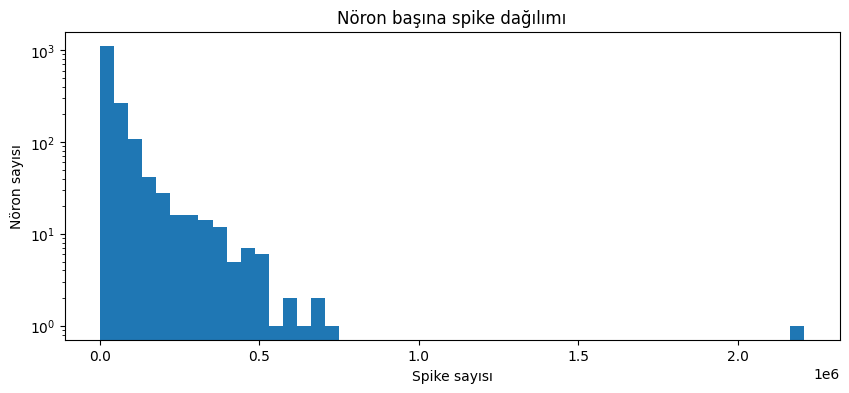


‚úì 1068 kaliteli n√∂ron bulundu (‚â•1000 spike)


In [12]:
# T√ºm n√∂ronlarƒ±n spike sayƒ±larƒ±nƒ± kontrol edelim
print("N√∂ron kalite kontrol√º yapƒ±lƒ±yor...\n")

neuron_spike_counts = []
for neuron_id in unique_neurons:
    neuron_spikes = spikes_times[spikes_clusters == neuron_id]
    neuron_spike_counts.append(len(neuron_spikes))

neuron_spike_counts = np.array(neuron_spike_counts)

print(f"Toplam n√∂ron sayƒ±sƒ±: {len(unique_neurons)}")
print(f"En az spike: {neuron_spike_counts.min()}")
print(f"En √ßok spike: {neuron_spike_counts.max()}")
print(f"Ortalama spike/n√∂ron: {neuron_spike_counts.mean():.1f}")
print(f"Medyan spike/n√∂ron: {np.median(neuron_spike_counts):.1f}")

# Histogram g√∂ster
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.hist(neuron_spike_counts, bins=50)
plt.xlabel('Spike sayƒ±sƒ±')
plt.ylabel('N√∂ron sayƒ±sƒ±')
plt.title('N√∂ron ba≈üƒ±na spike daƒüƒ±lƒ±mƒ±')
plt.yscale('log')
plt.show()

# ƒ∞yi n√∂ronlarƒ± filtrele (√∂rn: en az 1000 spike olanlar)
good_neurons = unique_neurons[neuron_spike_counts >= 1000]
print(f"\n‚úì {len(good_neurons)} kaliteli n√∂ron bulundu (‚â•1000 spike)")


N√∂ron 1 analizi:
Toplam spike: 3,388
Baseline spike sayƒ±sƒ±: 1,914
Shape: (385, 49) (trials √ó time bins)
Ortalama firing rate: 5.06 Hz

‚úì TAU: 200.0 ms
‚Üí Bu ORTA hƒ±zda bir n√∂ron


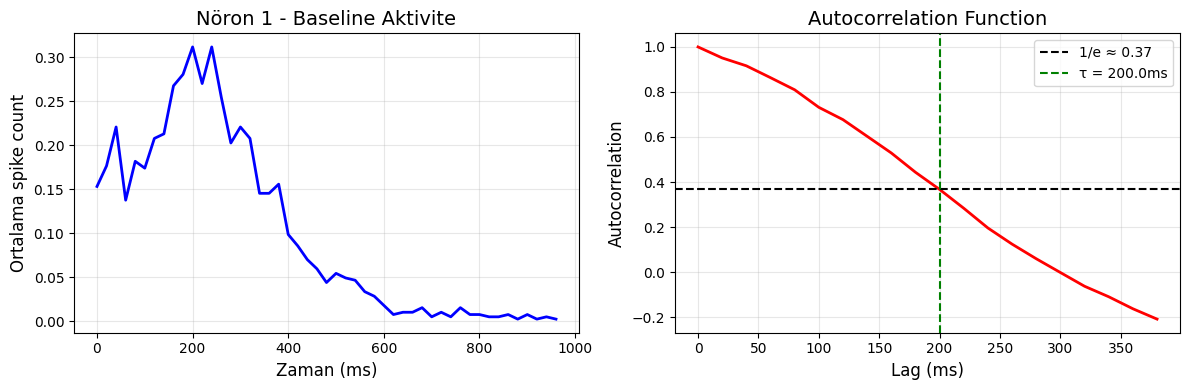

In [13]:
# ƒ∞yi bir n√∂ron se√ß ve tau hesapla
neuron_id = good_neurons[0]
neuron_spikes = spikes_times[spikes_clusters == neuron_id]

print(f"\nN√∂ron {neuron_id} analizi:")
print(f"Toplam spike: {len(neuron_spikes):,}")

# Baseline spikes
baseline_spikes = []
for t_start in trial_starts:
    spikes_in_baseline = neuron_spikes[(neuron_spikes >= t_start - 1.5) &
                                        (neuron_spikes < t_start - 0.5)]
    if len(spikes_in_baseline) > 0:
        baseline_spikes.append(spikes_in_baseline - (t_start - 1.5))

if len(baseline_spikes) > 0:
    all_baseline = np.concatenate(baseline_spikes)
    print(f"Baseline spike sayƒ±sƒ±: {len(all_baseline):,}")

    # 20ms binlerde spike count hesapla
    bin_size = 0.020  # 20ms
    max_time = 1.0    # Baseline 1 saniye
    bins = np.arange(0, max_time, bin_size)

    # Her trial i√ßin spike count
    spike_counts_per_trial = []
    for baseline_trial in baseline_spikes:
        counts, _ = np.histogram(baseline_trial, bins=bins)
        spike_counts_per_trial.append(counts)

    spike_counts_per_trial = np.array(spike_counts_per_trial)
    print(f"Shape: {spike_counts_per_trial.shape} (trials √ó time bins)")
    print(f"Ortalama firing rate: {spike_counts_per_trial.mean() / bin_size:.2f} Hz")

    # Autocorrelation hesapla
    from scipy.signal import correlate
    mean_spike_count = spike_counts_per_trial.mean(axis=0)

    autocorr = correlate(mean_spike_count - mean_spike_count.mean(),
                        mean_spike_count - mean_spike_count.mean(),
                        mode='full', method='auto')
    autocorr = autocorr[len(autocorr)//2:]
    autocorr = autocorr / autocorr[0]

    # Tau hesapla
    tau_threshold = 1/np.e
    tau_bins = np.where(autocorr < tau_threshold)[0]
    if len(tau_bins) > 0:
        tau_ms = tau_bins[0] * bin_size * 1000
        print(f"\n‚úì TAU: {tau_ms:.1f} ms")

        if tau_ms < 100:
            print("‚Üí Bu HIZLI bir n√∂ron (sensory benzeri)")
        elif tau_ms < 300:
            print("‚Üí Bu ORTA hƒ±zda bir n√∂ron")
        else:
            print("‚Üí Bu YAVA≈û bir n√∂ron (integrative/PFC benzeri)")
    else:
        print("\nTau √ßok uzun (>1000ms)")

    # G√∂rselle≈ütir
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(bins[:-1] * 1000, mean_spike_count, 'b-', linewidth=2)
    plt.xlabel('Zaman (ms)', fontsize=12)
    plt.ylabel('Ortalama spike count', fontsize=12)
    plt.title(f'N√∂ron {neuron_id} - Baseline Aktivite', fontsize=14)
    plt.grid(alpha=0.3)

    plt.subplot(1, 2, 2)
    lags_ms = np.arange(len(autocorr)) * bin_size * 1000
    plt.plot(lags_ms[:20], autocorr[:20], 'r-', linewidth=2)
    plt.axhline(tau_threshold, color='k', linestyle='--', label=f'1/e ‚âà {tau_threshold:.2f}')
    if len(tau_bins) > 0 and tau_bins[0] < 20:
        plt.axvline(tau_ms, color='g', linestyle='--', label=f'œÑ = {tau_ms:.1f}ms')
    plt.xlabel('Lag (ms)', fontsize=12)
    plt.ylabel('Autocorrelation', fontsize=12)
    plt.title('Autocorrelation Function', fontsize=14)
    plt.legend()
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("Bu n√∂ronda baseline spike yok!")

Toplam 1068 n√∂ron i√ßin tau hesaplanƒ±yor...

ƒ∞≈ülenen: 20/100 n√∂ron, Tau hesaplanan: 20
ƒ∞≈ülenen: 40/100 n√∂ron, Tau hesaplanan: 40
ƒ∞≈ülenen: 60/100 n√∂ron, Tau hesaplanan: 60
ƒ∞≈ülenen: 80/100 n√∂ron, Tau hesaplanan: 80
ƒ∞≈ülenen: 100/100 n√∂ron, Tau hesaplanan: 99

‚úì Toplam 99 n√∂ron i√ßin tau hesaplandƒ±

Tau ƒ∞statistikleri:
  Min: 20.0 ms
  Max: 220.0 ms
  Ortalama: 48.3 ms
  Medyan: 20.0 ms


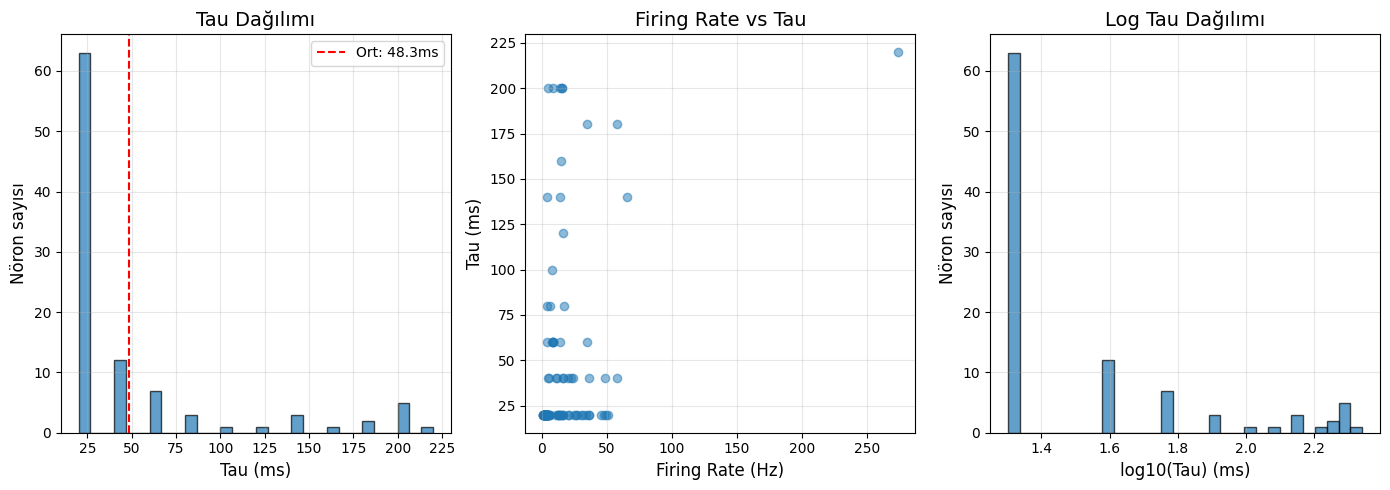


Kategorizasyon:
  Hƒ±zlƒ± n√∂ronlar (œÑ<100ms): 85 (85.9%)
  Orta n√∂ronlar (100‚â§œÑ<300ms): 14 (14.1%)
  Yava≈ü n√∂ronlar (œÑ‚â•300ms): 0 (0.0%)


In [14]:
# T√úM KALƒ∞TELƒ∞ N√ñRONLAR ƒ∞√áƒ∞N TAU HESAPLA
print(f"Toplam {len(good_neurons)} n√∂ron i√ßin tau hesaplanƒ±yor...\n")

tau_values = []
neuron_ids_with_tau = []
firing_rates = []

for idx, neuron_id in enumerate(good_neurons[:100]):  # ƒ∞lk 100'√º deneyelim
    neuron_spikes = spikes_times[spikes_clusters == neuron_id]

    # Baseline spikes
    baseline_spikes = []
    for t_start in trial_starts:
        spikes_in_baseline = neuron_spikes[(neuron_spikes >= t_start - 1.5) &
                                            (neuron_spikes < t_start - 0.5)]
        if len(spikes_in_baseline) > 0:
            baseline_spikes.append(spikes_in_baseline - (t_start - 1.5))

    if len(baseline_spikes) < 10:  # En az 10 trial gerekli
        continue

    all_baseline = np.concatenate(baseline_spikes)

    # 20ms binler
    bin_size = 0.020
    max_time = 1.0
    bins = np.arange(0, max_time, bin_size)

    spike_counts_per_trial = []
    for baseline_trial in baseline_spikes:
        counts, _ = np.histogram(baseline_trial, bins=bins)
        spike_counts_per_trial.append(counts)

    spike_counts_per_trial = np.array(spike_counts_per_trial)
    mean_spike_count = spike_counts_per_trial.mean(axis=0)

    # Firing rate
    fr = spike_counts_per_trial.mean() / bin_size

    # Autocorrelation
    from scipy.signal import correlate
    autocorr = correlate(mean_spike_count - mean_spike_count.mean(),
                        mean_spike_count - mean_spike_count.mean(),
                        mode='full', method='auto')
    autocorr = autocorr[len(autocorr)//2:]

    if autocorr[0] > 0:
        autocorr = autocorr / autocorr[0]

        # Tau hesapla
        tau_threshold = 1/np.e
        tau_bins = np.where(autocorr < tau_threshold)[0]

        if len(tau_bins) > 0:
            tau_ms = tau_bins[0] * bin_size * 1000
            if tau_ms > 10 and tau_ms < 1000:  # Makul aralƒ±k
                tau_values.append(tau_ms)
                neuron_ids_with_tau.append(neuron_id)
                firing_rates.append(fr)

    if (idx + 1) % 20 == 0:
        print(f"ƒ∞≈ülenen: {idx+1}/100 n√∂ron, Tau hesaplanan: {len(tau_values)}")

print(f"\n‚úì Toplam {len(tau_values)} n√∂ron i√ßin tau hesaplandƒ±")

# ƒ∞statistikler
tau_values = np.array(tau_values)
print(f"\nTau ƒ∞statistikleri:")
print(f"  Min: {tau_values.min():.1f} ms")
print(f"  Max: {tau_values.max():.1f} ms")
print(f"  Ortalama: {tau_values.mean():.1f} ms")
print(f"  Medyan: {np.median(tau_values):.1f} ms")

# G√∂rselle≈ütir
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.hist(tau_values, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Tau (ms)', fontsize=12)
plt.ylabel('N√∂ron sayƒ±sƒ±', fontsize=12)
plt.title('Tau Daƒüƒ±lƒ±mƒ±', fontsize=14)
plt.axvline(tau_values.mean(), color='r', linestyle='--', label=f'Ort: {tau_values.mean():.1f}ms')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 3, 2)
plt.scatter(firing_rates, tau_values, alpha=0.5)
plt.xlabel('Firing Rate (Hz)', fontsize=12)
plt.ylabel('Tau (ms)', fontsize=12)
plt.title('Firing Rate vs Tau', fontsize=14)
plt.grid(alpha=0.3)

plt.subplot(1, 3, 3)
plt.hist(np.log10(tau_values), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('log10(Tau) (ms)', fontsize=12)
plt.ylabel('N√∂ron sayƒ±sƒ±', fontsize=12)
plt.title('Log Tau Daƒüƒ±lƒ±mƒ±', fontsize=14)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Hƒ±zlƒ± vs yava≈ü n√∂ronlarƒ± kategorize et
fast_neurons = np.sum(tau_values < 100)
medium_neurons = np.sum((tau_values >= 100) & (tau_values < 300))
slow_neurons = np.sum(tau_values >= 300)

print(f"\nKategorizasyon:")
print(f"  Hƒ±zlƒ± n√∂ronlar (œÑ<100ms): {fast_neurons} ({100*fast_neurons/len(tau_values):.1f}%)")
print(f"  Orta n√∂ronlar (100‚â§œÑ<300ms): {medium_neurons} ({100*medium_neurons/len(tau_values):.1f}%)")
print(f"  Yava≈ü n√∂ronlar (œÑ‚â•300ms): {slow_neurons} ({100*slow_neurons/len(tau_values):.1f}%)")

In [15]:
# Beyin b√∂lgesini kontrol edelim
clusters = one.load_object(eid, 'clusters', collection=collection)
channels = one.load_object(eid, 'channels', collection=collection)

# Her cluster'ƒ±n hangi kanalda olduƒüunu bul
cluster_channels = clusters['channels']
brain_regions = channels.get('brainLocationIds_ccf_2017', None)

if brain_regions is not None:
    # Allen Atlas'ƒ± y√ºkle
    from ibllib.atlas import AllenAtlas
    ba = AllenAtlas()

    # Kaliteli n√∂ronlarƒ±n beyin b√∂lgelerini bul
    print("Kaliteli n√∂ronlarƒ±n beyin b√∂lgeleri:\n")
    region_counts = {}

    for neuron_id in good_neurons[:20]:  # ƒ∞lk 20 n√∂ronu kontrol et
        channel_idx = cluster_channels[neuron_id]
        region_id = brain_regions[channel_idx]
        region_info = ba.regions.get(region_id)

        if region_info:
            region_name = region_info['acronym']
            if region_name not in region_counts:
                region_counts[region_name] = 0
            region_counts[region_name] += 1

    print("\nB√∂lge Daƒüƒ±lƒ±mƒ±:")
    for region, count in sorted(region_counts.items(), key=lambda x: x[1], reverse=True):
        region_full = ba.regions.get(ba.regions.acronym2id(region))
        print(f"  {region}: {count} n√∂ron - {region_full['name']}")
else:
    print("Beyin b√∂lgesi bilgisi bulunamadƒ±")

(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_09/2023-10-19/001/alf/probe00/pykilosort/#2024-03-22#/clusters.depths.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.72k/6.72k [00:00<00:00, 41.3kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_09/2023-10-19/001/alf/probe00/pykilosort/#2024-03-22#/clusters.amps.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13.3k/13.3k [00:00<00:00, 150kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_09/2023-10-19/001/alf/probe00/pykilosort/#2024-03-22#/clusters.peakToTrough.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13.3k/13.3k [00:00<00:00, 68.2kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_09/2023-10-19/001/alf/probe00/pykilosort/#2024-03-22#/clusters.metrics.pqt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181k/181k [00:00<00:00, 936kB/s]
(S3) /root/Downloads/ONE/openalyx.inter

Beyin b√∂lgesi bilgisi bulunamadƒ±


In [16]:
# Diƒüer 3 oturumu kontrol edelim
print("Diƒüer oturumlarƒ± analiz ediyoruz...\n")

for session_idx, eid in enumerate(sessions_with_spikes, start=1):
    print(f"{'='*60}")
    print(f"OTURUM {session_idx}: {eid}")
    print(f"{'='*60}")

    # Spike dosyalarƒ±nƒ± bul
    datasets = one.list_datasets(eid)
    spike_files = [d for d in datasets if 'spikes.times' in d]
    channel_files = [d for d in datasets if 'channels.brain' in d or 'channels.mlapdv' in d]

    print(f"‚úì {len(spike_files)} probe bulundu")

    # Her probe i√ßin kontrol et
    for sf in spike_files:
        collection = sf.replace('/spikes.times.npy', '')
        print(f"\n  Probe: {collection}")

        # Beyin b√∂lgesi bilgisi var mƒ±?
        if any(collection in cf for cf in channel_files):
            print(f"    ‚úì Beyin b√∂lgesi bilgisi VAR!")

            # Y√ºkle
            try:
                channels = one.load_object(eid, 'channels', collection=collection)

                if 'brainLocationIds_ccf_2017' in channels:
                    brain_regions = channels['brainLocationIds_ccf_2017']
                    unique_regions = np.unique(brain_regions[brain_regions > 0])
                    print(f"    ‚Üí {len(unique_regions)} farklƒ± beyin b√∂lgesi")

                    # ƒ∞lk birka√ß b√∂lgeyi g√∂ster
                    from ibllib.atlas import AllenAtlas
                    ba = AllenAtlas()

                    print(f"    ‚Üí ƒ∞lk birka√ß b√∂lge:")
                    for region_id in unique_regions[:5]:
                        try:
                            region_info = ba.regions.get(region_id)
                            if region_info:
                                print(f"       ‚Ä¢ {region_info['acronym']}: {region_info['name']}")
                        except:
                            pass

                elif 'mlapdv' in channels:
                    print(f"    ‚úì 3D koordinatlar VAR (histoloji yapƒ±lmƒ±≈ü)")
                else:
                    print(f"    ‚úó Beyin b√∂lgesi bilgisi eksik")

            except Exception as e:
                print(f"    ‚úó Y√ºkleme hatasƒ±: {e}")
        else:
            print(f"    ‚úó Beyin b√∂lgesi bilgisi YOK")

    print()

Diƒüer oturumlarƒ± analiz ediyoruz...

OTURUM 1: ebce500b-c530-47de-8cb1-963c552703ea
‚úì 3 probe bulundu

  Probe: alf/probe00/pykilosort/#2024-03-22#
    ‚úó Beyin b√∂lgesi bilgisi YOK

  Probe: alf/probe00/pykilosort/#2024-05-06#
    ‚úì Beyin b√∂lgesi bilgisi VAR!


(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_09/2023-10-19/001/alf/probe00/pykilosort/#2024-05-06#/channels.brainLocationIds_ccf_2017.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.20k/3.20k [00:00<00:00, 22.7kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_09/2023-10-19/001/alf/probe00/pykilosort/#2024-05-06#/channels.rawInd.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.20k/3.20k [00:00<00:00, 27.8kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_09/2023-10-19/001/alf/probe00/pykilosort/#2024-05-06#/channels.labels.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 512/512 [00:00<00:00, 5.35kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_09/2023-10-19/001/alf/probe00/pykilosort/#2024-05-06#/channels.mlapdv.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.74k/4.74k [00:00<00:00, 47.6kB/s]
(S3) /root/Downloads/ONE/

    ‚Üí 16 farklƒ± beyin b√∂lgesi
    ‚úó Y√ºkleme hatasƒ±: No module named 'ibllib.atlas'

  Probe: alf/probe00/pykilosort
    ‚úì Beyin b√∂lgesi bilgisi VAR!
    ‚Üí 16 farklƒ± beyin b√∂lgesi
    ‚úó Y√ºkleme hatasƒ±: No module named 'ibllib.atlas'

OTURUM 2: a7eba2cf-427f-4df9-879b-e53e962eae18
‚úì 2 probe bulundu

  Probe: alf/probe00/pykilosort/#2024-05-06#
    ‚úì Beyin b√∂lgesi bilgisi VAR!


(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_08/2023-09-08/001/alf/probe00/pykilosort/#2024-05-06#/channels.rawInd.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.20k/3.20k [00:00<00:00, 27.9kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_08/2023-09-08/001/alf/probe00/pykilosort/#2024-05-06#/channels.localCoordinates.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.20k/3.20k [00:00<00:00, 31.1kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_08/2023-09-08/001/alf/probe00/pykilosort/#2024-05-06#/channels.brainLocationIds_ccf_2017.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.20k/3.20k [00:00<00:00, 20.3kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_08/2023-09-08/001/alf/probe00/pykilosort/#2024-05-06#/channels.mlapdv.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.74k/4.74k [00:00<00:00, 51.2kB/s]
(S3) /root/

    ‚Üí 12 farklƒ± beyin b√∂lgesi
    ‚úó Y√ºkleme hatasƒ±: No module named 'ibllib.atlas'

  Probe: alf/probe00/pykilosort
    ‚úì Beyin b√∂lgesi bilgisi VAR!
    ‚Üí 12 farklƒ± beyin b√∂lgesi
    ‚úó Y√ºkleme hatasƒ±: No module named 'ibllib.atlas'

OTURUM 3: 5ae68c54-2897-4d3a-8120-426150704385
‚úì 3 probe bulundu

  Probe: alf/probe00/pykilosort/#2024-03-22#
    ‚úó Beyin b√∂lgesi bilgisi YOK

  Probe: alf/probe00/pykilosort/#2024-05-06#
    ‚úì Beyin b√∂lgesi bilgisi VAR!


(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_08/2023-09-07/001/alf/probe00/pykilosort/#2024-05-06#/channels.brainLocationIds_ccf_2017.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.20k/3.20k [00:00<00:00, 37.9kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_08/2023-09-07/001/alf/probe00/pykilosort/#2024-05-06#/channels.labels.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 512/512 [00:00<00:00, 3.62kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_08/2023-09-07/001/alf/probe00/pykilosort/#2024-05-06#/channels.localCoordinates.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.20k/3.20k [00:00<00:00, 32.6kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/MFD_08/2023-09-07/001/alf/probe00/pykilosort/#2024-05-06#/channels.mlapdv.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.74k/4.74k [00:00<00:00, 47.0kB/s]
(S3) /root/Down

    ‚Üí 18 farklƒ± beyin b√∂lgesi
    ‚úó Y√ºkleme hatasƒ±: No module named 'ibllib.atlas'

  Probe: alf/probe00/pykilosort
    ‚úì Beyin b√∂lgesi bilgisi VAR!
    ‚Üí 18 farklƒ± beyin b√∂lgesi
    ‚úó Y√ºkleme hatasƒ±: No module named 'ibllib.atlas'

OTURUM 4: 3a3ea015-b5f4-4e8b-b189-9364d1fc7435
‚úì 2 probe bulundu

  Probe: alf/probe00a/pykilosort/#2024-05-06#
    ‚úì Beyin b√∂lgesi bilgisi VAR!


(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0029/2023-09-07/001/alf/probe00a/pykilosort/#2024-05-06#/channels.rawInd.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 896/896 [00:00<00:00, 4.98kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0029/2023-09-07/001/alf/probe00a/pykilosort/#2024-05-06#/channels.brainLocationIds_ccf_2017.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 896/896 [00:00<00:00, 7.80kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0029/2023-09-07/001/alf/probe00a/pykilosort/#2024-05-06#/channels.localCoordinates.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 896/896 [00:00<00:00, 10.7kB/s]
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0029/2023-09-07/001/alf/probe00a/pykilosort/#2024-05-06#/channels.mlapdv.npy: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.28k/1.28k [00:00<00:00, 15.6kB/s]
(S3) /root/Downloads/ONE/openalyx.inter

    ‚Üí 3 farklƒ± beyin b√∂lgesi
    ‚úó Y√ºkleme hatasƒ±: No module named 'ibllib.atlas'

  Probe: alf/probe00a/pykilosort
    ‚úì Beyin b√∂lgesi bilgisi VAR!
    ‚Üí 3 farklƒ± beyin b√∂lgesi
    ‚úó Y√ºkleme hatasƒ±: No module named 'ibllib.atlas'



In [17]:
# Atlas mod√ºl√ºn√º kur
!pip install --quiet ibllib

# ≈ûimdi beyin b√∂lgelerini g√∂relim
from iblatlas.atlas import AllenAtlas
ba = AllenAtlas()

print("="*70)
print("T√úM OTURUMLARIN BEYƒ∞N B√ñLGELERƒ∞")
print("="*70)

for session_idx, eid in enumerate(sessions_with_spikes, start=1):
    print(f"\n{'='*70}")
    print(f"OTURUM {session_idx}: {eid}")
    print(f"{'='*70}")

    # Spike dosyalarƒ±nƒ± bul
    datasets = one.list_datasets(eid)
    spike_files = [d for d in datasets if 'spikes.times' in d]

    # Her probe i√ßin
    for sf in spike_files:
        collection = sf.replace('/spikes.times.npy', '')

        # Sadece beyin b√∂lgesi bilgisi olanlarƒ± y√ºkle
        if any('brainLocationIds' in d and collection in d for d in datasets):
            print(f"\nProbe: {collection}")

            try:
                # Verileri y√ºkle
                channels = one.load_object(eid, 'channels', collection=collection)
                brain_regions = channels['brainLocationIds_ccf_2017']

                # Benzersiz b√∂lgeleri bul
                unique_regions = np.unique(brain_regions[brain_regions > 0])

                print(f"\n  üìç {len(unique_regions)} farklƒ± beyin b√∂lgesi bulundu:")

                # Her b√∂lge i√ßin bilgi
                region_info_list = []
                for region_id in unique_regions:
                    try:
                        region_info = ba.regions.get(region_id)
                        if region_info:
                            acronym = region_info['acronym']
                            name = region_info['name']

                            # Bu b√∂lgede ka√ß kanal var?
                            n_channels = np.sum(brain_regions == region_id)
                            region_info_list.append((acronym, name, n_channels))
                    except:
                        pass

                # Kanal sayƒ±sƒ±na g√∂re sƒ±rala
                region_info_list.sort(key=lambda x: x[2], reverse=True)

                # Yazdƒ±r
                for acronym, name, n_channels in region_info_list:
                    print(f"    ‚Ä¢ {acronym:8s} ({n_channels:3d} kanal): {name}")

                # Hƒ±zlƒ± vs yava≈ü b√∂lgeleri ayƒ±r
                print(f"\n  üîç B√∂lge Analizi:")

                fast_regions = ['VISp', 'VISa', 'VISam', 'VISpm', 'VISl', 'VISrl', 'SSp', 'SSs']
                slow_regions = ['PFC', 'ORB', 'ACA', 'PL', 'ILA', 'MOs', 'MOp', 'CP', 'ACB', 'OFC']

                found_fast = [acr for acr, _, _ in region_info_list if any(f in acr for f in fast_regions)]
                found_slow = [acr for acr, _, _ in region_info_list if any(s in acr for s in slow_regions)]

                if found_fast:
                    print(f"    ‚ö° HIZLI b√∂lgeler (sensory): {', '.join(found_fast)}")
                if found_slow:
                    print(f"    üêå YAVA≈û b√∂lgeler (integrative): {', '.join(found_slow)}")

                if not found_fast and not found_slow:
                    print(f"    ‚ùì Diƒüer b√∂lgeler (motor/subcortical)")

            except Exception as e:
                print(f"    ‚úó Hata: {e}")

print("\n" + "="*70)

Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/average_template_25.nrrd Bytes: 32998960


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 31.470260620117188/31.470260620117188 [00:00<00:00, 153.50it/s]


Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/annotation_25.nrrd Bytes: 4035363


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.848422050476074/3.848422050476074 [00:00<00:00, 43.35it/s]


T√úM OTURUMLARIN BEYƒ∞N B√ñLGELERƒ∞

OTURUM 1: ebce500b-c530-47de-8cb1-963c552703ea

Probe: alf/probe00/pykilosort/#2024-05-06#

  üìç 16 farklƒ± beyin b√∂lgesi bulundu:
    ‚Ä¢ PO       (118 kanal): Posterior complex of the thalamus
    ‚Ä¢ LP       ( 60 kanal): Lateral posterior nucleus of the thalamus
    ‚Ä¢ CA1      ( 56 kanal): Field CA1
    ‚Ä¢ CA3      ( 30 kanal): Field CA3
    ‚Ä¢ DG-mo    ( 26 kanal): Dentate gyrus molecular layer
    ‚Ä¢ SSp-tr5  ( 24 kanal): Primary somatosensory area trunk layer 5
    ‚Ä¢ SSp-tr6a ( 20 kanal): Primary somatosensory area trunk layer 6a
    ‚Ä¢ SSp-tr4  ( 16 kanal): Primary somatosensory area trunk layer 4
    ‚Ä¢ ccs      (  6 kanal): corpus callosum splenium
    ‚Ä¢ or       (  6 kanal): optic radiation
    ‚Ä¢ SSp-tr6b (  4 kanal): Primary somatosensory area trunk layer 6b
    ‚Ä¢ alv      (  4 kanal): alveus
    ‚Ä¢ DG-sg    (  4 kanal): Dentate gyrus granule cell layer
    ‚Ä¢ SSp-tr2/3 (  4 kanal): Primary somatosensory area trunk la